In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
data=pd.read_csv("/home/hemanth/Documents/DeepLearning/CNN/diabetes.csv")

Exploratory Data Analysis

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.shape

(768, 9)

In [10]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
from matplotlib.colors import ListedColormap 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score ,confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor 
from sklearn.decomposition import PCA 

In [73]:
import chart_studio.plotly as py
import plotly.graph_objs as go
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
#import plotly.graph_objs as go
import itertools
plt.style.use('fivethirtyeight')
import seaborn as sns
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [18]:
#Split Data as M&B
p = data[data.Outcome == 1]
n = data[data.Outcome == 0]


Visualization

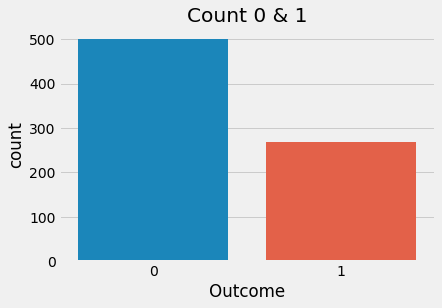

In [19]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

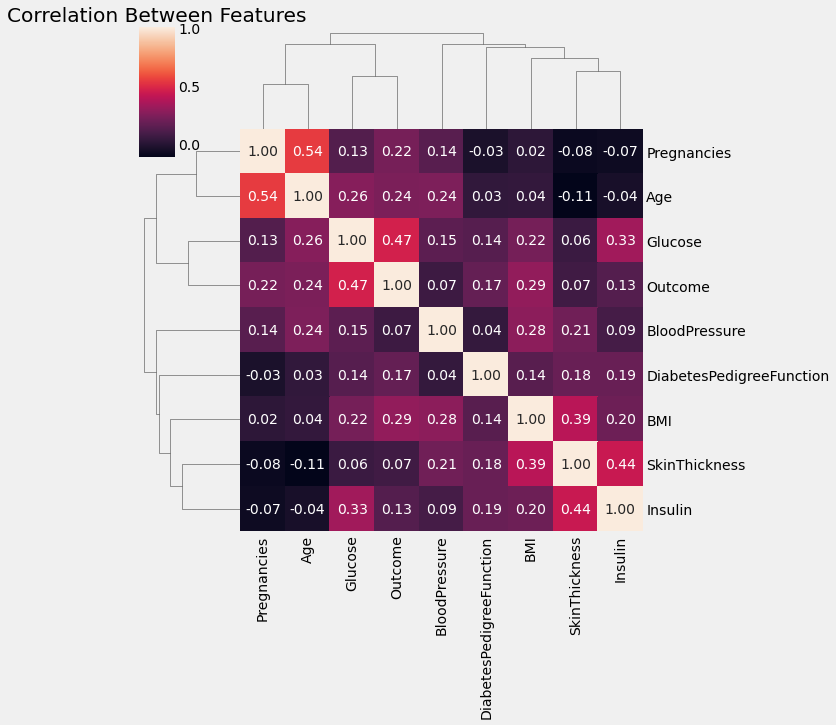

In [20]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

Feautre Visualization with Box plot [Before Standardization]

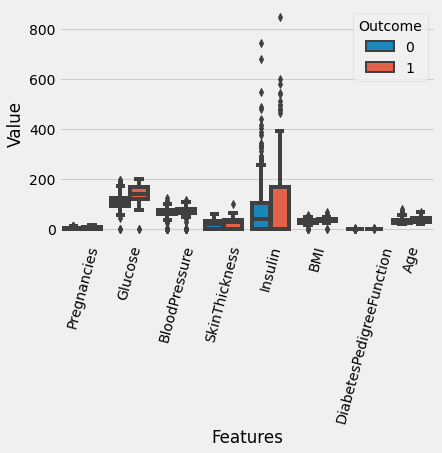

'\nWe will need standardization.\n'

In [21]:
#Box p. öncesi bir melted işlemi gerekitor.
data_melted = pd.melt(data,id_vars='Outcome',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='Outcome',data=data_melted) #Featureslar target'a göre ayrıldı.
plt.xticks(rotation=75) #Feature isimleri 90 derece dik görülecek.
plt.show()

"""
We will need standardization.
"""

Analysis of Diabetic Cases

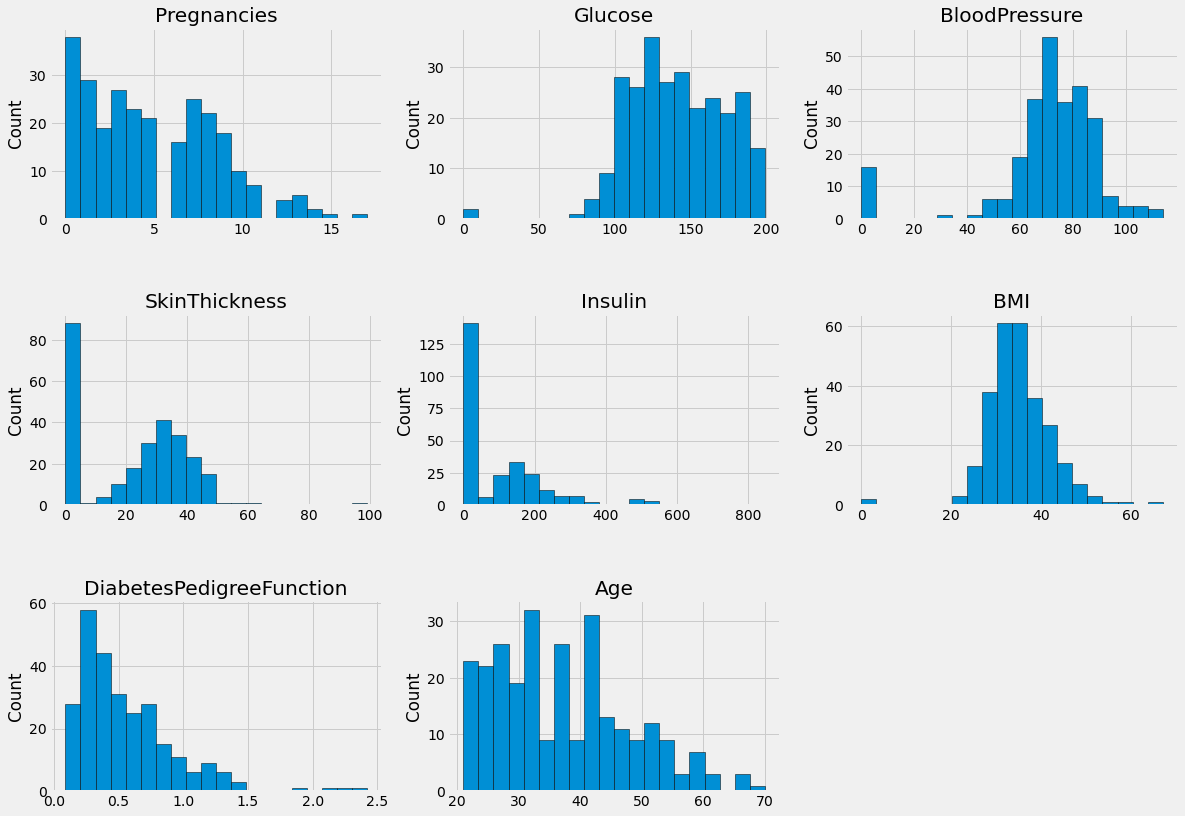

In [22]:
#General Analysis

data1 = data[data["Outcome"]==1]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()


Analysis of Non-Diabetic Cases

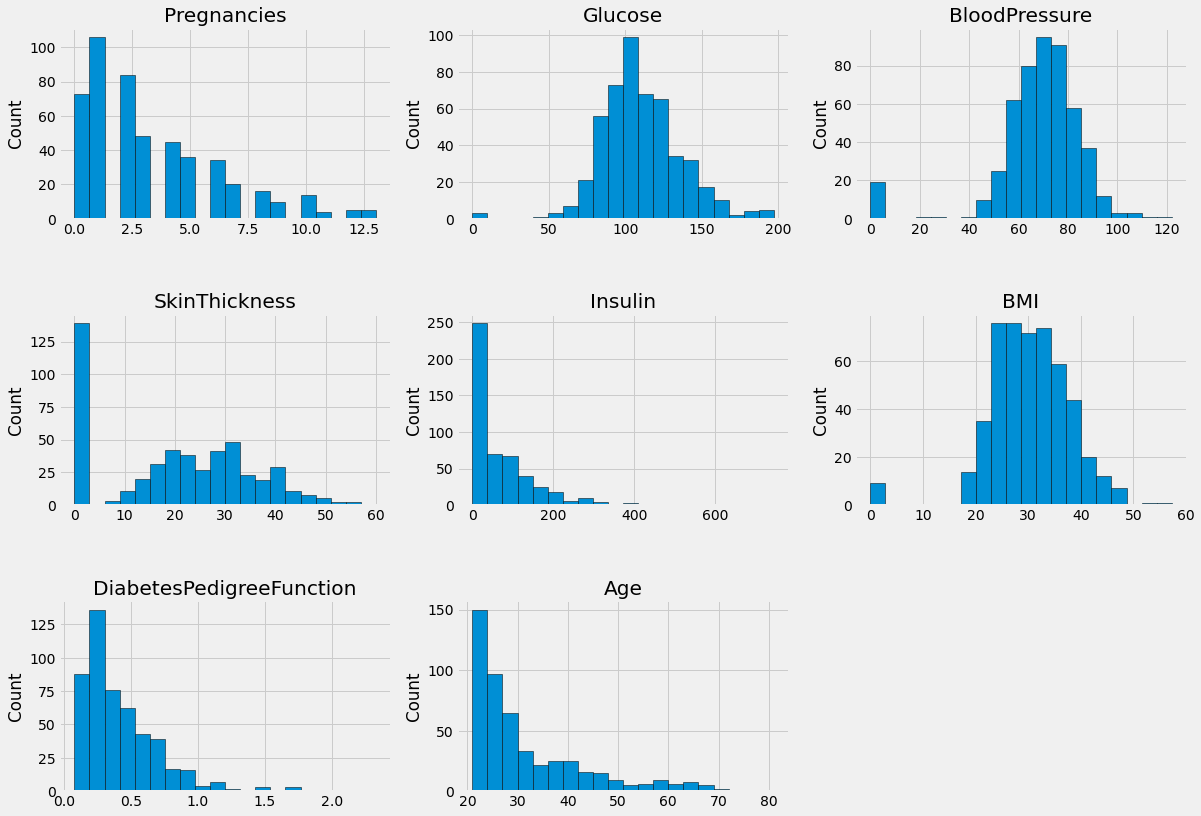

In [23]:
#General Analysis

data1 = data[data["Outcome"]==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Visualization, Scatter Plot

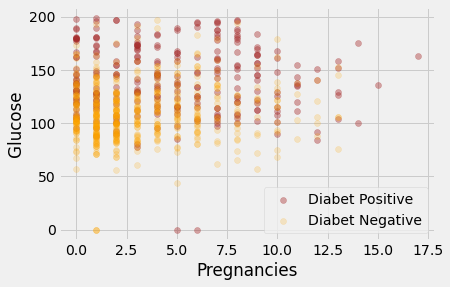

In [24]:
plt.scatter(p.Pregnancies,p.Glucose,color = "brown",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "Orange",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

#We appear that it is clear segregation.


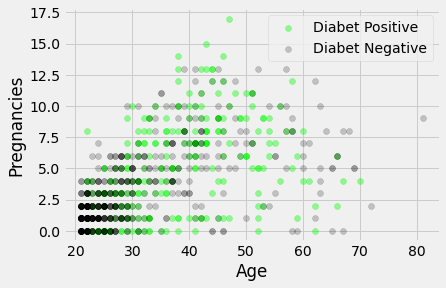

In [25]:
#Visualization, Scatter Plot

plt.scatter(p.Age,p.Pregnancies,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Age,n.Pregnancies,color = "black",label="Diabet Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()

#We appear that it is clear segregation.

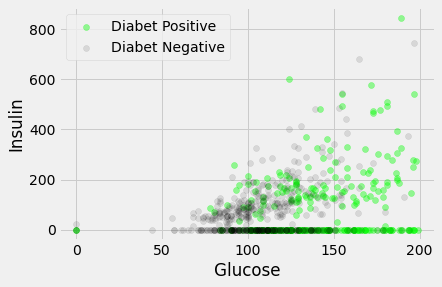

In [26]:
#Visualization, Scatter Plot

plt.scatter(p.Glucose,p.Insulin,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Glucose,n.Insulin,color = "black",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

#We appear that it is clear segregation.

Outlier Detection

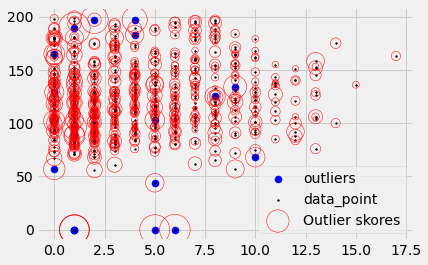

In [27]:
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
columns = x.columns.tolist() # Featureların isimlerini bir listede topladık.

clf = LocalOutlierFactor() #KNN değeri gerekiyor. Tanımlı değeri 20 ve bizde 20 kullanacağız. O nedenle birşey yazmayacağız.
y_pred = clf.fit_predict(x) #LOF uygulayıo negetif outlier f. alıyoruz.

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score['score'] = x_score

threshold_outliers = -1.5
filtre = outlier_score['score'] < threshold_outliers
outlier_index = outlier_score[filtre].index.tolist() #outlier değerlerine threshold uygulanmış olanları bir listeye attık

plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = 'blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
            ,x.iloc[:,1],color='k',s=3,label='data_point') #s : boyut

radius = (x_score.max() - x_score ) / (x_score.max() - x_score.min() ) #Değerleri normalize ederek biası önledik
outlier_score['radius '] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();

Drop Outliers

In [28]:
x = x.drop(outlier_index) #outliers remove
y = y.drop(outlier_index).values #outliers remove



Train - Tespt Split

In [29]:
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)


Standardizasyon

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scaler isimli bir değişkene Standartscaler metodunu atayıp sonra bu değişken aracılığıyla xtraindeki verileri standardize ettik

x_test = scaler.transform(x_test)

x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train


Box Plot Visualization after the Standardization

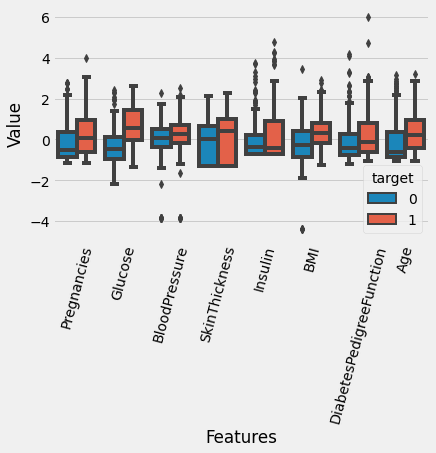

In [31]:
data_melted = pd.melt(x_train_df,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) #Featureslar target'a göre ayrıldı.
plt.xticks(rotation=75) #Feature isimleri 90 derece dik görülecek.
plt.show()


Comparison of ML Classification Algorithms

Logistic Regression Classification

In [32]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()



In [33]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = LR, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))



Average Accuracies:  0.7587082728592163
Standart Deviation Accuracies:  0.0593241656716101


In [34]:
LR.fit(x_train,y_train)
print("Test Accuracy {}".format(LR.score(x_test,y_test))) 

LRscore = LR.score(x_test,y_test)

Test Accuracy 0.8088888888888889


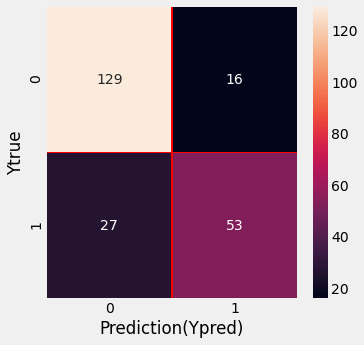

In [35]:
#Confusion Matrix

yprediciton1= LR.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton1)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

K-NN

In [36]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train) #Calculation (In the supervise learning this section = training)
y_predict = knn.predict(x_test) #Test Section
cm = confusion_matrix(y_test, y_predict) #Plooting
acc = accuracy_score(y_test, y_predict) #Accuracy Score
score = knn.score(x_test, y_test) #acc ile burasının sonucu aynı çıkacak. Doğrulama amaçlı yapılıyor.

print("Score:",score)
print("CM:",cm)
print("Basic KNN Acc:",acc)


Score: 0.7066666666666667
CM: [[135  10]
 [ 56  24]]
Basic KNN Acc: 0.7066666666666667


In [37]:
def KNN_best_parameters(x_train,x_test,y_train,y_test):
    
    k_range = list(range(1,51)) #En uygun k değeri buluma
    weight_options = ['uniform','distance'] #En uygun weighti buluma
    #manhattan_distance = 1
    #euclidean_distance = 2
    distance_options = [1,2] #En uygun distance type buluma
    print()
    param_grid = dict(n_neighbors=k_range,weights=weight_options,p=distance_options) #Aranacak parametreleri bir sözlükte topladık.

    knn =KNeighborsClassifier() #Parametrelerin deneneceği knn oluşturuldu.
    grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy') #Parametrelerin aranması için method
    grid.fit(x_train, y_train) #fitting ile best parm. elde edildi
    
    print('Best training score: {} with parametres: {}'.format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) #Test setinde deneme işlemi için
    knn.fit(x_train, y_train)
    
    y_predict_test = knn.predict(x_test)
    y_predict_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test,y_predict_test)
    cm_train = confusion_matrix(y_train,y_predict_train)

    acc_test = accuracy_score(y_test,y_predict_test)  
    acc_train = accuracy_score(y_train,y_predict_train)

    print('Test Score: {}, Train Score: {}'.format(acc_test,acc_train))
    print()
    print('CM Test:',cm_test)
    print('CM Train:',cm_train)
    
    return grid

In [38]:
grid = KNN_best_parameters(x_train,x_test,y_train,y_test)


Best training score: 0.7642235123367199 with parametres: {'n_neighbors': 36, 'p': 1, 'weights': 'distance'}

Test Score: 0.8177777777777778, Train Score: 1.0

CM Test: [[137   8]
 [ 33  47]]
CM Train: [[342   0]
 [  0 180]]


In [39]:
KNNscore = grid.best_score_


Text(0.5, 1.0, 'PCA: P1 Vs P2')

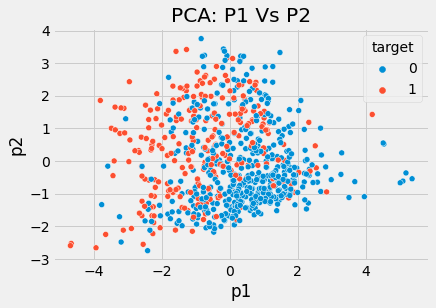

In [40]:
#%% PCA

scale = StandardScaler()
x_scaled = scaler.fit_transform(x) #x verisi bölünmeden tam bir şekilde PCA için scale edildi. 

pca = PCA(n_components=2) #2 componentli bir PCA oluşturduk.
pca.fit(x_scaled)
x_reduce_pca = pca.transform(x_scaled) #2feature'a yani boyuta düşürülmüş x 
pca_data =pd.DataFrame(x_reduce_pca,columns=['p1','p2']) #reduce datadan incelemek için bir dataframe oluşturuldu
pca_data['target'] = y #buna target eklendi. Görselleştirmek için gerekli.

sns.scatterplot(x='p1',y='p2',hue='target',data=pca_data) # targeta göre renklendirilmiş grafik
plt.title('PCA: P1 Vs P2')

In [41]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduce_pca,y,test_size=test_size,random_state=42)

grid_pca = KNN_best_parameters(x_train_pca, x_test_pca, y_train_pca, y_test_pca)
#en iyi parametreleri elde ettiğimiz metodu PCA için çalıştırıyorum.




Best training score: 0.7277576197387519 with parametres: {'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}

Test Score: 0.7333333333333333, Train Score: 0.7509578544061303

CM Test: [[125  20]
 [ 40  40]]
CM Train: [[305  37]
 [ 93  87]]


Text(0.5, 1.0, "2-Class classification (k = 14, weights = 'uniform')")

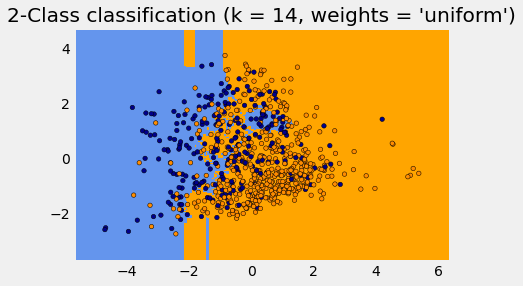

In [42]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = x_reduce_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

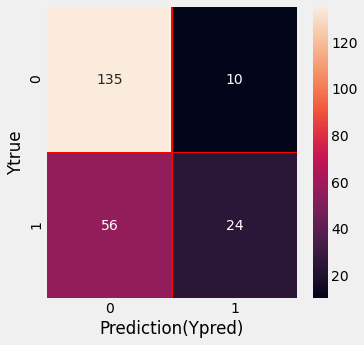

In [43]:
#Confusion Matrix

yprediciton2= knn.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

SVM

In [44]:
#SVM with Sklearn

from sklearn.svm import SVC

SVM = SVC(random_state=42)

In [45]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= x_train, y=y_train, cv=5)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7412820512820513
Standart Deviation Accuracies:  0.03222565856288667


In [46]:
SVM.fit(x_train,y_train)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(x_test,y_test))

SVMscore = SVM.score(x_test,y_test)


SVM Accuracy: 0.7866666666666666


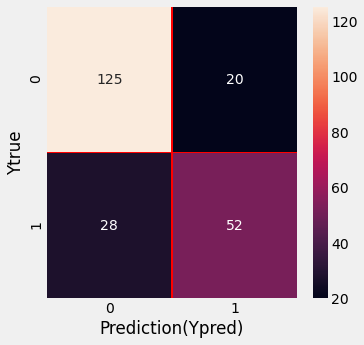

In [47]:
#Confusion Matrix

yprediciton3= SVM.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton3)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

Naive Bayes Classification

In [48]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()



In [49]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = NB, X= x_train, y=y_train, cv=35)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))


Average Accuracies:  0.7549659863945577
Standart Deviation Accuracies:  0.11221677652262926


In [50]:
NB.fit(x_train,y_train) #learning
#prediction
print("Accuracy of NB Score: ", NB.score(x_test,y_test))

NBscore= NB.score(x_test,y_test)

Accuracy of NB Score:  0.7466666666666667


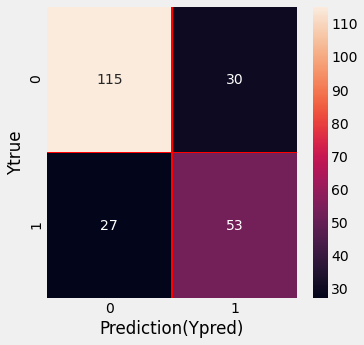

In [51]:
#Confusion Matrix

yprediciton4= NB.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton4)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

Decision Tree

In [52]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [53]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = DTC, X= x_train, y=y_train, cv=55)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7143434343434343
Standart Deviation Accuracies:  0.14421384432363832


In [54]:
DTC.fit(x_train,y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(x_test,y_test))
DTCscore = DTC.score(x_test,y_test)


Decision Tree Score:  0.6977777777777778


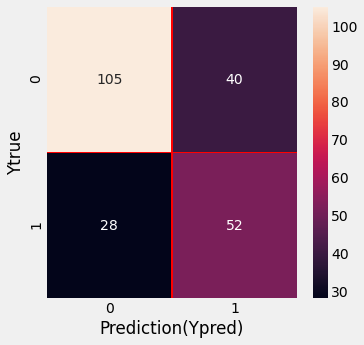

In [55]:
#Confusion Matrix

yprediciton5= DTC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton5)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

Random Forest

In [56]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(x_test,y_test))


Decision Tree Score:  0.7022222222222222


In [57]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 82, random_state=42) #n_estimator = DT



In [58]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = RFC, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7663280116110305
Standart Deviation Accuracies:  0.06465725630236509


In [59]:
RFC.fit(x_train,y_train) # learning
print("Random Forest Score: ",RFC.score(x_test,y_test))
RFCscore=RFC.score(x_test,y_test)

Random Forest Score:  0.8177777777777778


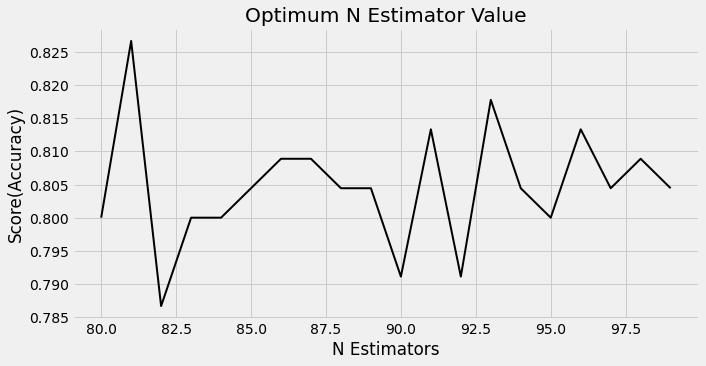

In [60]:
#Find Optimum K value
scores = []
for each in range(80,100):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(x_train,y_train)
    scores.append(RFfind.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(80,100),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

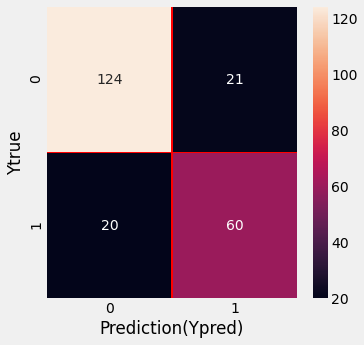

In [61]:
#Confusion Matrix

yprediciton6= RFC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton6)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()



Artificial Neural Network

In [62]:
#Import Library
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense


In [63]:
def buildclassifier():
    classifier = Sequential() #initialize NN
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu', input_dim =x_train.shape[1]))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier



In [64]:
classifier = KerasClassifier(build_fn = buildclassifier, epochs = 500)
accuracies = cross_val_score(estimator = classifier, X = x_train, y= y_train, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/500
14/14 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.6475
Epoch 2/500
14/14 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.6475
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.6475
Epoch 4/500
14/14 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.6475
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.6475
Epoch 6/500
14/14 [==============================] - 0s 972us/step - loss: 0.6044 - accuracy: 0.6475
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.6475
Epoch 8/500
14/14 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.6475
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 0.4921 - accuracy: 0.6475
Epoch 10/500
14/14 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.6475
Epoch 1

ML Algorithms F1-Scores

In [65]:
#F1-Score For Logistic Regression
from sklearn.metrics import f1_score
LRf1 = f1_score(ytrue, yprediciton1, average='weighted') 
LRf1

0.8053265153936294

In [66]:
#K-NN
KNNf1= f1_score(ytrue, yprediciton2, average='weighted') 
KNNf1

0.6675647451963242

In [67]:
#SVM
SVMf1=f1_score(ytrue, yprediciton3, average='weighted') 
SVMf1

0.7839161662545626

In [68]:
#naive bayes
NBf1 = f1_score(ytrue, yprediciton4, average='weighted') 
NBf1



0.7476739131983782

In [69]:
#Decision Tree
DTf1=f1_score(ytrue, yprediciton5, average='weighted') 
DTf1

0.7017976316621121

In [70]:
#RandomForest
RFf1=f1_score(ytrue, yprediciton6, average='weighted') 
RFf1


0.8180284219399611

Scatter Plot For Comparasion of ML Algorithms Prediciton Scores

In [74]:
scores=[LRscore,KNNscore,SVMscore,NBscore,DTCscore,RFCscore,mean]
AlgorthmsName=["Logistic Regression","K-NN","SVM","Naive Bayes","Decision Tree", "Random Forest","Artificial Neural Network"]

#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)



Scatter Plot For Comparasion of ML Algorithms Prediciton Scores (F1)

In [75]:
scoresf1=[LRf1,KNNf1,SVMf1,NBf1,DTf1,RFf1]
#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scoresf1,
    name='Algortms Name',
    marker =dict(color='rgba(225,126,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group", 
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores(F1)',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Conclusion

    1.Thank you for investigation my kernel.
    2.I was comparison ML Classification Algorithms with the Pima Indians Diabetes Database.
    3.I found the best result with Random Forest and SVM.
    4.I expect your opinion and criticism.
